In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import json

import warnings
warnings.filterwarnings('ignore')
from scipy import stats自作関数 競合 python

from IPython.display import display
from selenium import webdriver
from time import sleep
from funcs import *

print(os.listdir('../data/movie'))

SyntaxError: invalid syntax (<ipython-input-11-30667aeaf98a>, line 11)

In [12]:
df_train = pd.read_csv('../data/movie/train.csv')
df_test = pd.read_csv('../data/movie/test.csv')

In [13]:
df_train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [14]:
df_train['log_rev'] = np.log(df_train['revenue'] + 1)

In [15]:
fillna_all(df_train, df_test, 'crew')
open_json(df_train, df_test, 'crew')

In [16]:
df_train['crew_list'] = df_train['crew'].apply(lambda x: list_from_json(x, 'job'))

In [17]:
unique = make_unique_list(df_train, 'crew_list')

In [18]:
all_power(df_train, df_test, unique)

AttributeError: 'function' object has no attribute 'boxcox'

In [ ]:
df_train['belongs_to_collection'][0]

In [11]:
def get_list(x, name):
    if x == 'none':
        return 'none'
    else:
        results = []
        jsons = eval(x)
        for json in jsons:
            results.append(json[name])
    return results

def find_collection(x):
    if x == 'none':
        return 3
    else:
        for word in x:
            judge = word.find('Collection')
            if judge > 0:
                return 1
            else:
                return 2

In [12]:
df_train['belongs_to_collection'] = df_train['belongs_to_collection'].fillna('none')
df_test['belongs_to_collection'] = df_test['belongs_to_collection'].fillna('none')

df_train['collection_list'] = df_train['belongs_to_collection'].apply(lambda x: get_list(x, 'name'))
df_test['collection_list'] = df_test['belongs_to_collection'].apply(lambda x: get_list(x, 'name'))

df_train['collection_var'] = df_train['collection_list'].apply(lambda x: find_collection(x))
df_test['collection_var'] = df_test['collection_list'].apply(lambda x: find_collection(x))

((array([-3.50184707, -3.25811987, -3.12333914, ...,  3.12333914,
          3.25811987,  3.50184707]),
  array([ 0.        ,  0.        ,  0.        , ..., 19.45030016,
         19.51929304, 19.75568181])),
 (6.227710193591296, 11.878667325853948, 0.8361088624427624))

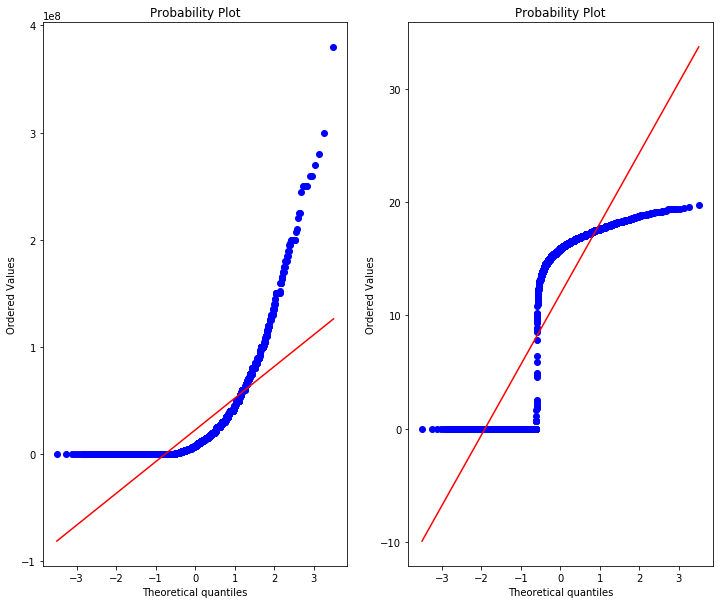

In [13]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 10)

stats.probplot(df_train["budget"], dist='norm', fit=True, plot=ax[0])
x = np.log(df_train['budget'] + 1)
stats.probplot(x, dist='norm', fit=True, plot=ax[1])


In [14]:
boxcox_train , ramda = stats.boxcox(df_train['budget'] + 1)
boxcox_test, ramda = stats.boxcox(df_test['budget'] + 1)

df_train['box_budget'] = boxcox_train
df_test['box_budget'] = boxcox_test

In [15]:
fillna_all(df_train, df_test, 'genres')

In [16]:
df_train['genre_list'] = df_train['genres'].apply(lambda x: list_from_json(x, 'name'))
df_test['genre_list'] = df_test['genres'].apply(lambda x: list_from_json(x, 'name'))

In [17]:
genre_unique = make_unique_list(df_train, 'genre_list')

In [18]:
fillna_all(df_train, df_test, 'homepage')

In [19]:
def return_homepage(x):
    if x == 'none':
        return 0
    else:
        return 1

In [20]:
df_train['homepage_var'] = df_train['homepage'].apply(lambda x: return_homepage(x))
df_test['homepage_var'] = df_test['homepage'].apply(lambda x: return_homepage(x))

In [21]:
df_train['homepage_var'].value_counts()

0    2054
1     946
Name: homepage_var, dtype: int64

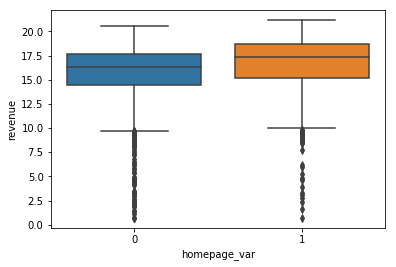

In [22]:
x = df_train['homepage_var']
y = np.log(df_train['revenue'] + 1)

sns.boxplot(x, y)

In [23]:
df_train['original_language'].value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
ko      20
cn      20
zh      19
de      18
ta      16
sv       8
pt       6
nl       6
da       5
fa       5
ro       4
tr       3
hu       3
no       2
fi       2
pl       2
ml       2
te       2
vi       1
el       1
id       1
he       1
bn       1
ar       1
cs       1
nb       1
sr       1
mr       1
ur       1
Name: original_language, dtype: int64

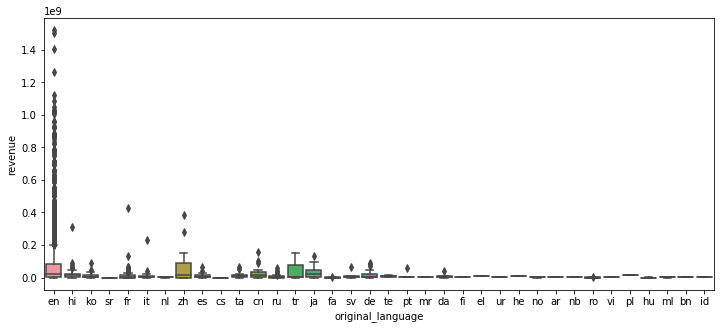

In [24]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='original_language', y='revenue', data=df_train)

<Figure size 864x360 with 0 Axes>

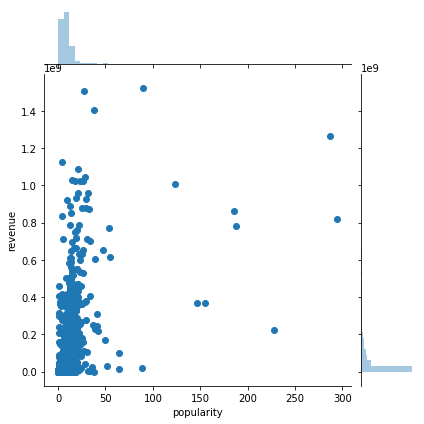

In [25]:
plt.figure(figsize=(12, 5))
sns.jointplot(x='popularity', y='revenue', data=df_train)

((array([-3.50184707, -3.25811987, -3.12333914, ...,  3.12333914,
          3.25811987,  3.50184707]),
  array([-0.86082499, -0.86075336, -0.86067609, ...,  5.28914989,
          5.59253759,  5.62468116])),
 (0.7860052729617347, 1.0664820759128761, 0.975978811964621))

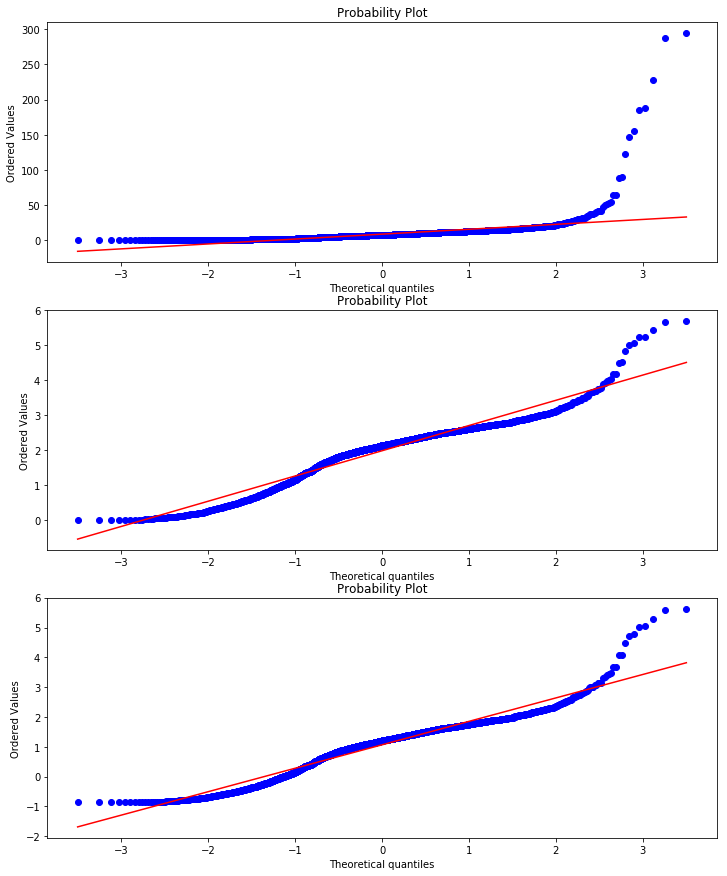

In [26]:
fig, ax = plt.subplots(3, 1)
fig.set_size_inches(12, 15)

x = df_train['popularity']
y = np.log(df_train['popularity'] + 1)
z, lamda = stats.boxcox(y)


stats.probplot(x, dist='norm', fit=True, plot=ax[0])
stats.probplot(y, dist='norm', fit=True, plot=ax[1])
stats.probplot(z, dist='norm', fit=True, plot=ax[2])

((array([-3.60248851, -3.36513686, -3.23421605, ...,  3.23421605,
          3.36513686,  3.60248851]),
  array([9.99999574e-07, 4.63908412e-04, 6.56816397e-04, ...,
         7.90906305e+00, 8.22567264e+00, 1.04637914e+01])),
 (0.9765855802123765, 2.365959282356195, 0.9795254310638688))

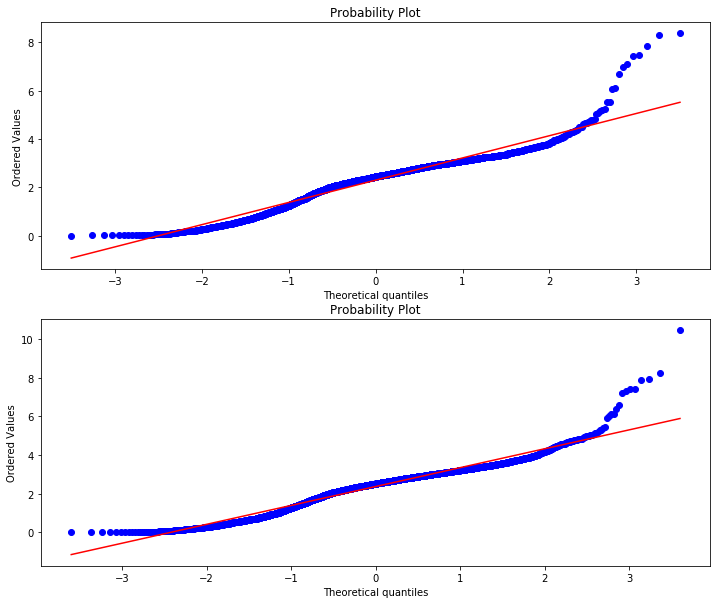

In [27]:
boxcox1 , lamda = stats.boxcox(df_train['popularity']+ 1)
boxcox2 , lamda = stats.boxcox(df_test['popularity']+ 1)

fig, ax = plt.subplots(2, 1)
fig.set_size_inches(12, 10)

stats.probplot(boxcox1, dist='norm', fit=True, plot=ax[0])
stats.probplot(boxcox2, dist='norm', fit=True, plot=ax[1])

In [28]:
df_train['popularity_var'] = boxcox1
df_test['popularity_var'] = boxcox2

In [29]:
df_train['runtime'] = df_train['runtime'].fillna(df_train['runtime'].median())
df_test['runtime'] = df_test['runtime'].fillna(df_test['runtime'].median())

((array([-3.60248851, -3.36513686, -3.23421605, ...,  3.23421605,
          3.36513686,  3.60248851]),
  array([  0.,   0.,   0., ..., 238., 254., 320.])),
 (19.990388364300852, 107.61891768985903, 0.949104787161294))

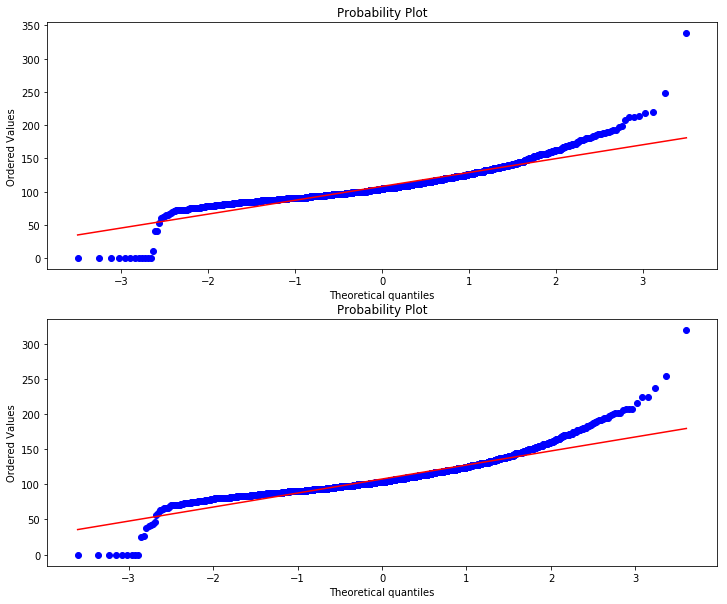

In [30]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(12, 10)

stats.probplot(df_train['runtime'], dist='norm', fit=True, plot=ax[0])
stats.probplot(df_test['runtime'], dist='norm', fit=True, plot=ax[1])

((array([-3.60248851, -3.36513686, -3.23421605, ...,  3.23421605,
          3.36513686,  3.60248851]),
  array([9.99999500e-07, 4.63892385e-04, 6.56784270e-04, ...,
         5.22612774e+00, 5.36993968e+00, 6.30716594e+00])),
 (0.7341993967740755, 1.98544932858735, 0.9770765777606262))

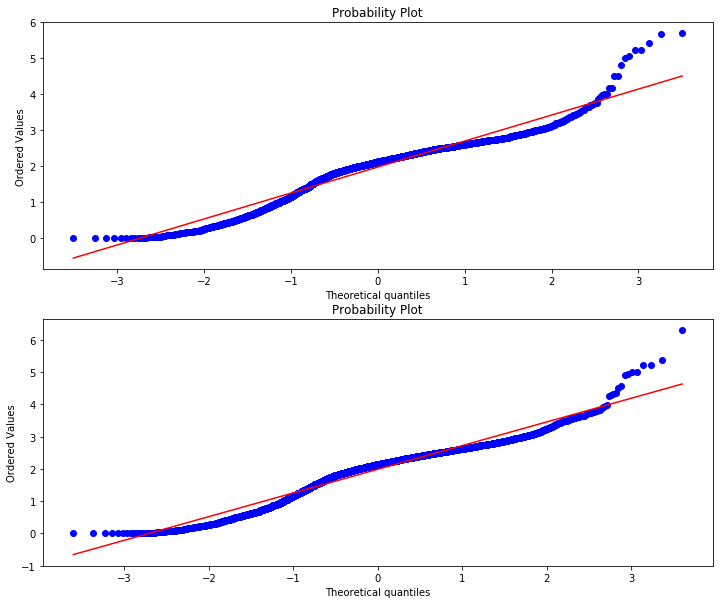

In [31]:
boxcox1, lamda = stats.boxcox(df_train['runtime'] + 1)
boxcox2, lamda = stats.boxcox(df_test['runtime'] + 1)

log1 = np.log(df_train['popularity'] + 1)
log2 = np.log(df_test['popularity'] + 1)

fig, ax = plt.subplots(2, 1)
fig.set_size_inches(12, 10)

stats.probplot(log1, dist='norm', fit=True, plot=ax[0])
stats.probplot(log2, dist='norm', fit=True, plot=ax[1])

In [32]:
df_train['popularity_var'] = log1
df_test['popularity_var'] = log2

In [33]:
fillna_all(df_train, df_test, 'production_companies')

In [34]:
df_train['company_list'] = df_train['production_companies'].apply(lambda x: list_from_json(x, 'name'))
df_test['company_list'] = df_test['production_companies'].apply(lambda x: list_from_json(x, 'name'))

In [35]:
unique_list1 = make_unique_list(df_train, 'company_list')
unique_list2 = make_unique_list(df_test, 'company_list')

In [36]:
sort_company1 = dict_count(df_train, 'company_list', unique_list1)
sort_company2 = dict_count(df_test, 'company_list', unique_list2)

dict_company1 = dict(sort_company1)
dict_company2 = dict(sort_company2)

In [37]:
def mean_count(x, sort_dict):
    count = 0
    if x == 'none' or x == []:
        return count
    else:
        for word in x:
            count = sort_dict[word]
        return count

In [38]:
df_train['company_var'] = df_train['company_list'].apply(lambda x: mean_count(x, dict_company1))
df_test['company_var'] = df_test['company_list'].apply(lambda x: mean_count(x, dict_company2))

<Figure size 864x360 with 0 Axes>

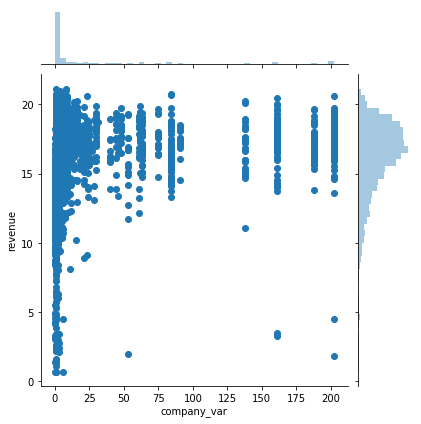

In [39]:
plt.figure(figsize=(12, 5))
x = df_train['company_var']
y = np.log(df_train['revenue'] + 1)

sns.jointplot(x, y)

In [40]:
fillna_all(df_train, df_test, 'production_countries')

In [41]:
df_train['country_list'] = df_train['production_countries'].apply(lambda x: list_from_json(x, 'name'))
df_test['country_list'] = df_test['production_countries'].apply(lambda x: list_from_json(x, 'name'))

In [42]:
unique_list1 = make_unique_list(df_train, 'country_list')
unique_list2 = make_unique_list(df_test, 'country_list')

sort_country1 = dict_count(df_train, 'country_list', unique_list1)
sort_country2 = dict_count(df_test, 'country_list', unique_list2)

dict_country1 = dict(sort_country1)
dict_country2 = dict(sort_country2)

In [43]:
df_train['country_var'] = df_train['country_list'].apply(lambda x: mean_count(x, dict_country1))
df_test['country_var'] = df_test['country_list'].apply(lambda x: mean_count(x, dict_country2))

<Figure size 864x360 with 0 Axes>

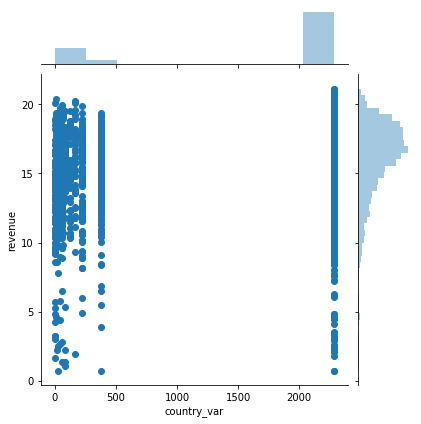

In [44]:
plt.figure(figsize=(12, 5))
x = df_train['country_var']
y = np.log(df_train['revenue'] + 1)

sns.jointplot(x, y)

In [45]:
df_train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity',
       ...
       'collection_list', 'collection_var', 'box_budget', 'genre_list',
       'homepage_var', 'popularity_var', 'company_list', 'company_var',
       'country_list', 'country_var'],
      dtype='object', length=449)

In [46]:
df_train['release_year'] = df_train['release_date'].apply(lambda x: x[-2:])

df_test['release_date'] = df_test['release_date'].fillna('11/11/00')
df_test['release_year'] = df_test['release_date'].apply(lambda x: x[-2:])

In [47]:
def get_year(year):
    year = int(year)
    if year > 20 and year < 100:
        return 1900 + year
    else:
        return 2000 + year

In [48]:
df_train['release_year'] = df_train['release_year'].apply(lambda x: get_year(x))
df_test['release_year'] = df_test['release_year'].apply(lambda x: get_year(x))

In [49]:
df_test['status'].value_counts()

Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

In [50]:
display(df_test[df_test['status'] == 'Post Production'])
df_test['status'] = df_test['status'].fillna('Released')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,collection_var,box_budget,genre_list,homepage_var,popularity_var,company_list,company_var,country_list,country_var,release_year
264,3265,none,0,"[{'id': 99, 'name': 'Documentary'}]",http://thelastmountainmovie.com/,tt1787816,en,The Last Mountain,"In the valleys of Appalachia, a battle is bein...",0.078210,...,3,0.000000,[Documentary],1,0.075302,[Falco],1,[United States of America],3335,2011
847,3848,none,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",http://goodtime.movie/,tt4846232,en,Good Time,A bank robber tries to avoid the law closing i...,5.798555,...,3,0.000000,"[Drama, Thriller, Crime]",1,1.916710,"[Rhea Films, A24, Elara Pictures]",1,[United States of America],3335,2017
1260,4261,none,6000000,"[{'id': 18, 'name': 'Drama'}]",http://www.whatmaisieknewmovie.com,tt1932767,en,What Maisie Knew,"Based on the Henry James novella, the story fr...",8.535611,...,3,47.778380,[Drama],1,2.255033,"[Image Entertainment, 120dB Films, 10th Hole P...",1,[United States of America],3335,2013
1448,4449,none,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",none,tt0090886,en,Crimes of the Heart,Three sisters with quite different personaliti...,2.524937,...,3,0.000000,"[Drama, Family]",0,1.259863,"[De Laurentiis Entertainment Group (DEG), De L...",1,[United States of America],3335,1986
2585,5586,none,2000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",http://www.sonyclassics.com/higherground/,tt1562568,en,Higher Ground,A chronicle of one woman's lifelong struggle w...,1.137468,...,3,40.667649,"[Drama, Thriller]",1,0.759622,none,0,[United States of America],3335,2011


In [51]:
fillna_all(df_train, df_test, 'spoken_languages')

df_train['spoken_list'] = df_train['spoken_languages'].apply(lambda x: list_from_json(x, 'name'))
df_test['spoken_list'] = df_test['spoken_languages'].apply(lambda x: list_from_json(x, 'name'))

unique_list1 = make_unique_list(df_train, 'spoken_list')
unique_list2 = make_unique_list(df_test, 'spoken_list')

sort_spoken1 = dict_count(df_train, 'spoken_list', unique_list1)
sort_spoken2 = dict_count(df_test, 'spoken_list', unique_list2)

dict_spoken1 = dict(sort_spoken1)
dict_spoken2 = dict(sort_spoken2)

df_train['spoken_var'] = df_train['spoken_list'].apply(lambda x: mean_count(x, dict_spoken1))
df_test['spoken_var'] = df_test['spoken_list'].apply(lambda x: mean_count(x, dict_spoken2))

plt.figure(figsize=(12, 5))
x = df_train['spoken_var']
y = np.log(df_train['revenue'] + 1)

sns.jointplot(x, y)

boxcox , lamda = stats.boxcox(df_train['spoken_var'] + 1)
boxcox = np.log(boxcox)
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(12, 10)

stats.probplot(df_train['spoken_var'], dist='norm', fit=True, plot=ax[0])
stats.probplot(boxcox, dist='norm', fit=True, plot=ax[1])

In [52]:
fillna_all(df_train, df_test, 'cast')

In [53]:
df_train['cast_list'] = df_train['cast'].apply(lambda x: list_from_json(x, 'name'))
df_test['cast_list'] = df_test['cast'].apply(lambda x: list_from_json(x, 'name'))

unique_list1 = make_unique_list(df_train, 'cast_list')
unique_list2 = make_unique_list(df_test, 'cast_list')

sort_cast1 = dict_count(df_train, 'cast_list', unique_list1)
sort_cast2 = dict_count(df_test, 'cast_list', unique_list2)

dict_cast1 = dict(sort_cast1)
dict_cast2 = dict(sort_cast2)

In [54]:
df_train['cast_var'] = df_train['cast_list'].apply(lambda x: mean_count(x, dict_cast1))
df_test['cast_var'] = df_test['cast_list'].apply(lambda x: mean_count(x, dict_cast2))

In [55]:
boxcox1, lamda = stats.boxcox(df_train['cast_var'] + 1)
boxcox2, lamda = stats.boxcox(df_test['cast_var'] + 1)

((array([-3.50184707, -3.25811987, -3.12333914, ...,  3.12333914,
          3.25811987,  3.50184707]),
  array([0.        , 0.        , 0.        , ..., 0.87856461, 0.87856461,
         0.88289716])),
 (0.12063707266501383, 0.5795319724257615, 0.8859429083356465))

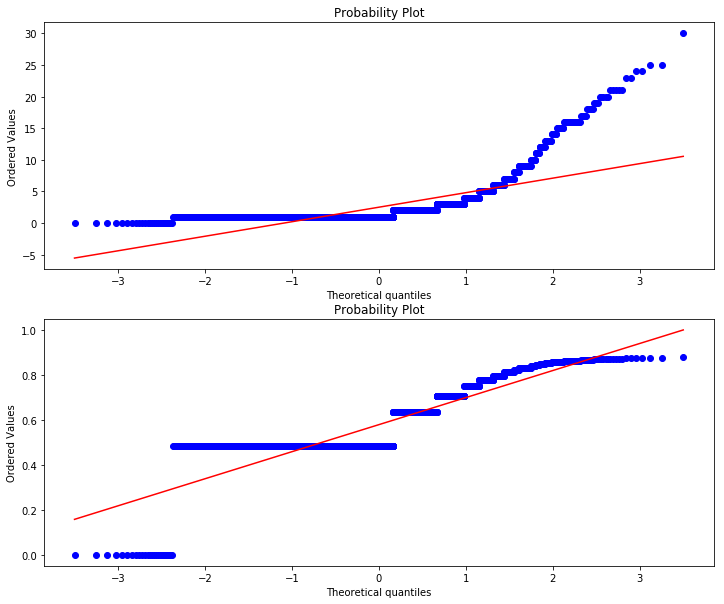

In [56]:
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(12, 10)
x = df_train['cast_var']
y = df_train['revenue']
z = boxcox1

stats.probplot(x, dist='norm', fit=True, plot=ax[0])
stats.probplot(z, dist='norm', fit=True, plot=ax[1])

In [57]:
df_train['cast_var'] = boxcox1
df_test['cast_var'] = boxcox2

In [58]:
def len_crew(x):
    if x == 'none':
        return 0
    else:
        crew = eval(x)
        return len(crew)

In [59]:
fillna_all(df_train, df_test, 'crew')

In [60]:
df_train['crew_var'] = df_train['crew'].apply(lambda x: len_crew(x))
df_test['crew_var'] = df_test['crew'].apply(lambda x: len_crew(x))

((array([-3.50184707, -3.25811987, -3.12333914, ...,  3.12333914,
          3.25811987,  3.50184707]),
  array([0.        , 0.        , 0.        , ..., 5.21027339, 5.24379199,
         5.30250316])),
 (1.0009758131711113, 2.7584078706332553, 0.9954152097535781))

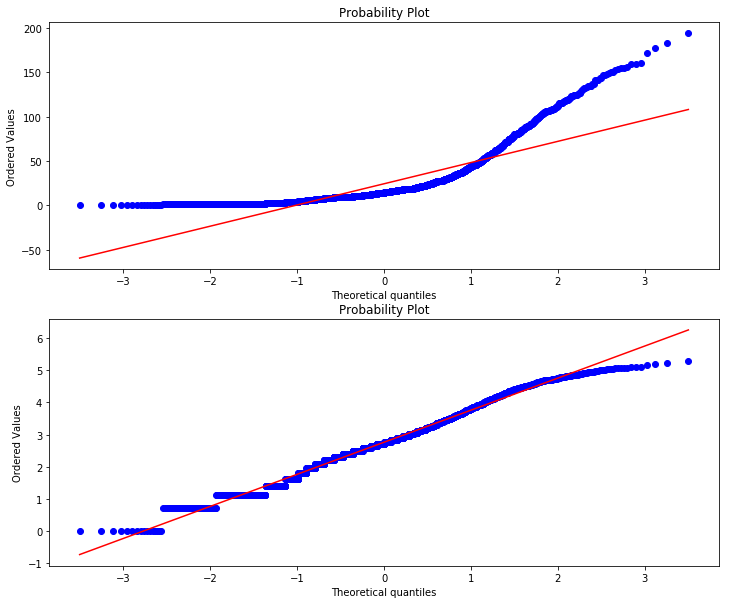

In [61]:
boxcox1, lamda = stats.boxcox(df_train['crew_var']+1)
boxcox2, lamda = stats.boxcox(df_test['crew_var']+1)

fig, ax = plt.subplots(2, 1)
fig.set_size_inches(12, 10)

stats.probplot(df_train['crew_var'], dist='norm', fit=True, plot=ax[0])
stats.probplot(boxcox1, dist='norm', fit=True, plot=ax[1])

In [62]:
df_train['crew_var'] = boxcox1
df_test['crew_var'] = boxcox2

df_train = pd.get_dummies(df_train, columns=['original_language'])
df_test = pd.get_dummies(df_test, columns=['original_language'])

In [63]:
Drop_list = ['belongs_to_collection', 'budget', 'genres', 'homepage','imdb_id', 'original_title', 'overview',
              'popularity', 'poster_path', 'production_companies','production_countries', 'release_date', 'runtime', 'spoken_languages',
              'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'collection_list','company_list','country_list',
              'cast_list']
drop_all(df_train, df_test, Drop_list)

In [64]:
create_getdummies(df_train, 'genre', 'genre_list')
create_getdummies(df_test, 'genre', 'genre_list')

df_train.drop(['genre_list'], axis=1, inplace=True)
df_test.drop(['genre_list'], axis=1, inplace=True)

df_train.drop(['genre_TV Movie'], axis=1, inplace=True)


In [65]:
diff_col(df_train, df_test)

{'crew_list', 'log_rev', 'revenue'}

In [66]:
drop_all(df_train, df_test, 'original_language')

In [70]:
Drop_list = ['company_var', 'country_var', 'new_crew', 'genre_none', 'none_var']

drop_all(df_train, df_test, Drop_list)

In [71]:
import sklearn.preprocessing as prepro
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [103]:
train = df_train.drop(['id', 'revenue', 'crew_list', 'log_rev'], axis=1)
train_ = df_train['log_rev']
test = df_test.drop(['id'], axis=1)

#X_train = prepro.PolynomialFeatures(include_bias=False).fit_transform(train)
#y_train = train_.values / 10
#X_test = prepro.PolynomialFeatures(include_bias=False).fit_transform(test)

X_train = sc.fit_transform(train.values)
y_train = train_.values 
X_test = sc.fit_transform(test.values)


print(X_train.shape, y_train.shape, X_test.shape)

(3000, 438) (3000,) (4398, 438)


In [90]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam, RMSprop

In [98]:
model = Sequential()

model.add(Dense(440, activation='relu', input_dim=438))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(500, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(250, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 440)               193160    
_________________________________________________________________
dropout_9 (Dropout)          (None, 440)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10000)             4410000   
_________________________________________________________________
dropout_10 (Dropout)         (None, 10000)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 10001     
Total params: 4,613,161
Trainable params: 4,613,161
Non-trainable params: 0
_________________________________________________________________


In [108]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)
predict = model.predict(X_test)
predict

array([16.60777564, 14.42388717, 16.06328674, ..., 17.41835047,
       15.17298622, 15.93899144])

In [109]:
predict = np.e**predict
predict

array([16317939.46472338,  1837446.08030099,  9466660.29231096, ...,
       36702318.04841006,  3886370.39663218,  8360187.70101115])

In [99]:
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=50, batch_size=100, validation_split=0.3, verbose=1)
print(history.history.keys())

scores = model.evaluate(X_train, y_train, batch_size=30)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

Train on 2100 samples, validate on 900 samples
Epoch 1/50
2100/2100 [==============================] - 3s 1ms/step - loss: 6.5555 - mean_absolute_error: 1.5439 - val_loss: 1.8156 - val_mean_absolute_error: 1.2030
Epoch 2/50
2100/2100 [==============================] - 2s 1ms/step - loss: 0.7221 - mean_absolute_error: 0.5598 - val_loss: 0.7633 - val_mean_absolute_error: 0.8150
Epoch 3/50
2100/2100 [==============================] - 2s 1ms/step - loss: 0.3317 - mean_absolute_error: 0.4206 - val_loss: 0.3387 - val_mean_absolute_error: 0.5294
Epoch 4/50
2100/2100 [==============================] - 2s 1ms/step - loss: 0.2200 - mean_absolute_error: 0.3437 - val_loss: 0.3326 - val_mean_absolute_error: 0.4868
Epoch 5/50
2100/2100 [==============================] - 2s 1ms/step - loss: 0.1594 - mean_absolute_error: 0.3041 - val_loss: 0.3690 - val_mean_absolute_error: 0.5573
Epoch 6/50
2100/2100 [==============================] - 2s 1ms/step - loss: 0.1447 - mean_absolute_error: 0.2827 - val_loss

KeyboardInterrupt: 

In [93]:
predict = model.predict(X_test) * 10

In [94]:
predict = np.e**predict

In [95]:
predict

array([[14320.648  ],
       [ 1071.3153 ],
       [ 5594.116  ],
       ...,
       [30606.854  ],
       [  253.14975],
       [ 3936.6504 ]], dtype=float32)

In [110]:
df_out = pd.read_csv('../data/movie/test.csv')
df_out['revenue'] = predict
df_out[['id', 'revenue']].to_csv('../data/movie/output/deep.csv', index=False, header=True)